# Ant Colony Optimization for TSP
### Key Components

*   Graph Representation: A distance matrix is used to represent the cities and distances between them.

*   Pheromone Initialization: A pheromone matrix keeps track of pheromone levels between cities.

*   Ant Movement: Ants probabilistically choose the next city based on pheromone levels and distances.


*   Pheromone Update: Pheromone trails are updated based on the quality of solutions found by the ants.


*   Evaporation: Pheromones evaporate over time to prevent stagnation

    
        

In [1]:
# Importing necessary libraries
import numpy as np
import random


In [2]:
# Parameters
NUM_CITIES = 10
NUM_ANTS = 20
NUM_ITERATIONS = 100
ALPHA = 1  # Importance of pheromone
BETA = 2   # Importance of heuristic (1 / distance)
EVAPORATION_RATE = 0.5
Q = 100  # Pheromone deposit factor


In [3]:
# Generate a random distance matrix (symmetric)
np.random.seed(42)
distances = np.random.randint(10, 100, size=(NUM_CITIES, NUM_CITIES)) #This function call will generate a NUM_CITIES x NUM_CITIES matrix (2D array) filled with random integers between 10 (inclusive) and 100 (exclusive).
np.fill_diagonal(distances, 0)

# Initialize pheromone matrix
pheromones = np.ones((NUM_CITIES, NUM_CITIES))

# Define the heuristic information (inverse of distance)
heuristic = 1 / (distances + 1e-10)  # Avoid division by zero

print(distances)


[[ 0 24 81 70 30 92 96 84 84 97]
 [33  0 31 62 11 97 39 47 11 73]
 [69 30  0 85 67 31 98 58 68 51]
 [69 89 24  0 71 56 71 60 64 73]
 [12 60 16 30  0 48 27 13 98 69]
 [23 18 99 62 11  0 69 80 53 17]
 [56 44 87 90 45 59  0 11 15 63]
 [13 63 72 27 99 53 43  0 71 23]
 [57 24 81 87 96 71 49 94  0 91]
 [62 33 35 98 69 50 38 24 54  0]]


In [4]:
# Ant Colony Optimization for TSP
def ant_colony_tsp():
    global pheromones
    best_distance = float('inf')
    best_path = None

    for iteration in range(NUM_ITERATIONS):
        all_paths = []
        all_distances = []

        for ant in range(NUM_ANTS):
            path = []
            visited = set()

            # Start at a random city
            current_city = random.randint(0, NUM_CITIES - 1)
            path.append(current_city)
            visited.add(current_city)

            # Build the tour
            while len(path) < NUM_CITIES:
                probabilities = []
                for next_city in range(NUM_CITIES):
                    if next_city not in visited:
                        pheromone = pheromones[current_city][next_city] ** ALPHA
                        attractiveness = heuristic[current_city][next_city] ** BETA
                        probabilities.append(pheromone * attractiveness)
                    else:
                        probabilities.append(0)

                probabilities = np.array(probabilities)
                probabilities /= probabilities.sum()
                next_city = np.random.choice(range(NUM_CITIES), p=probabilities)
                path.append(next_city)
                visited.add(next_city)
                current_city = next_city

            # Complete the tour
            path.append(path[0])  # Return to the start
            all_paths.append(path)

            # Calculate total distance of the tour
            total_distance = sum(distances[path[i]][path[i + 1]] for i in range(len(path) - 1))
            all_distances.append(total_distance)

            # Update best solution
            if total_distance < best_distance:
                best_distance = total_distance
                best_path = path

        # Update pheromone matrix
        pheromones *= (1 - EVAPORATION_RATE)  # Evaporation
        for path, distance in zip(all_paths, all_distances):
            for i in range(len(path) - 1):
                pheromones[path[i]][path[i + 1]] += Q / distance
                pheromones[path[i + 1]][path[i]] += Q / distance  # Symmetric update

        # Print progress
        print(f"Iteration {iteration + 1}: Best distance = {best_distance}")

    return best_path, best_distance




# Output

The algorithm will print the best tour and its distance after all iterations:


```
Iteration 1: Best distance = 542
Iteration 2: Best distance = 498
...
Best TSP Tour: [0, 2, 5, 4, 3, 1, 7, 6, 8, 9, 0]
Best Tour Distance: 432

```



In [5]:
# Run the algorithm
best_tour, best_tour_distance = ant_colony_tsp()
print("\nBest TSP Tour:", best_tour)
print("Best Tour Distance:", best_tour_distance)


Iteration 1: Best distance = 282
Iteration 2: Best distance = 270
Iteration 3: Best distance = 267
Iteration 4: Best distance = 267
Iteration 5: Best distance = 267
Iteration 6: Best distance = 256
Iteration 7: Best distance = 256
Iteration 8: Best distance = 256
Iteration 9: Best distance = 249
Iteration 10: Best distance = 249
Iteration 11: Best distance = 249
Iteration 12: Best distance = 249
Iteration 13: Best distance = 249
Iteration 14: Best distance = 249
Iteration 15: Best distance = 249
Iteration 16: Best distance = 249
Iteration 17: Best distance = 249
Iteration 18: Best distance = 249
Iteration 19: Best distance = 249
Iteration 20: Best distance = 249
Iteration 21: Best distance = 249
Iteration 22: Best distance = 249
Iteration 23: Best distance = 249
Iteration 24: Best distance = 249
Iteration 25: Best distance = 249
Iteration 26: Best distance = 249
Iteration 27: Best distance = 249
Iteration 28: Best distance = 249
Iteration 29: Best distance = 249
Iteration 30: Best dist

### Code Breakdown


*   Graph Representation:

distances: A symmetric matrix representing distances between cities.

pheromones: A matrix initialized with equal pheromone values.


*   Ant Movement:

Probabilities are calculated using both pheromone levels and heuristic information:

        Pij=τijα⋅ηijβ∑k∉visitedτikα⋅ηikβ
        Pij​=∑k∈/visited​τikα​⋅ηikβ​τijα​⋅ηijβ​​
        tau_{ij}: Pheromone level between cities ii and jj.
        eta_{ij}: Heuristic value (1/distance).

*   Pheromone Update:

Pheromones are updated based on the quality of solutions found:

        Δτij=QL
        Δτij​=LQ​
        QQ: Constant factor.
        LL: Tour length.

*   Evaporation: Pheromone levels decay over time to prevent early convergence.



## Plotting a graph for better understanding

Iteration 1: Best distance = 270
Iteration 2: Best distance = 252
Iteration 3: Best distance = 252
Iteration 4: Best distance = 252
Iteration 5: Best distance = 252
Iteration 6: Best distance = 252
Iteration 7: Best distance = 252
Iteration 8: Best distance = 252
Iteration 9: Best distance = 252
Iteration 10: Best distance = 252
Iteration 11: Best distance = 252
Iteration 12: Best distance = 252
Iteration 13: Best distance = 252
Iteration 14: Best distance = 252
Iteration 15: Best distance = 252
Iteration 16: Best distance = 252
Iteration 17: Best distance = 249
Iteration 18: Best distance = 249
Iteration 19: Best distance = 249
Iteration 20: Best distance = 249
Iteration 21: Best distance = 249
Iteration 22: Best distance = 249
Iteration 23: Best distance = 249
Iteration 24: Best distance = 249
Iteration 25: Best distance = 249
Iteration 26: Best distance = 249
Iteration 27: Best distance = 249
Iteration 28: Best distance = 249
Iteration 29: Best distance = 249
Iteration 30: Best dist

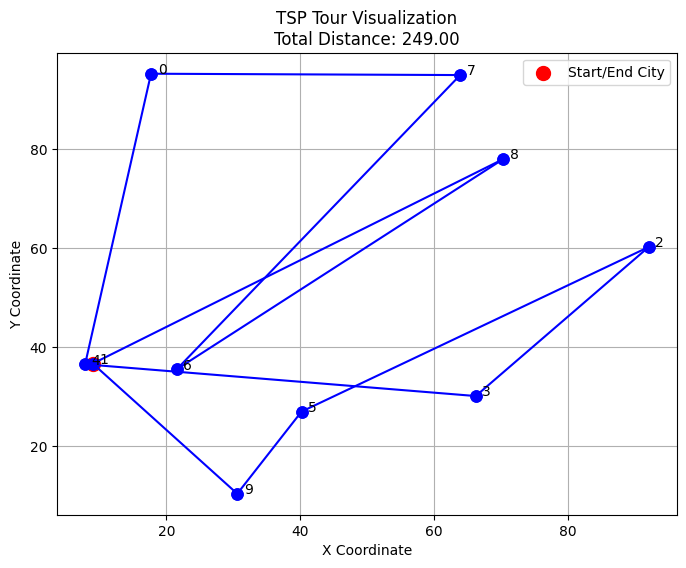

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random coordinates for cities
city_coords = np.random.rand(NUM_CITIES, 2) * 100  # Random coordinates in a 100x100 grid

# Plot function for TSP tour
def plot_tsp_tour(tour, coords, distance):
    plt.figure(figsize=(8, 6))
    for i in range(len(tour) - 1):
        start = coords[tour[i]]
        end = coords[tour[i + 1]]
        plt.plot([start[0], end[0]], [start[1], end[1]], 'b-o', markersize=8)

    # Highlight the first city
    plt.scatter(coords[tour[0], 0], coords[tour[0], 1], c='red', s=100, label='Start/End City')
    for idx, (x, y) in enumerate(coords):
        plt.text(x + 1, y, f'{idx}', fontsize=10)

    plt.title(f"TSP Tour Visualization\nTotal Distance: {distance:.2f}")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the algorithm
best_tour, best_tour_distance = ant_colony_tsp()
print("\nBest TSP Tour:", best_tour)
print("Best Tour Distance:", best_tour_distance)

# Plot the best tour
plot_tsp_tour(best_tour, city_coords, best_tour_distance)
